Name: Rishika Mishra

PRN: 1032210945

Batch: A2

CV EXPERIMENT 5

In [9]:
import cv2
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

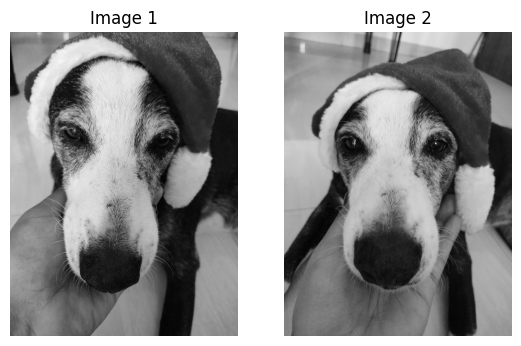

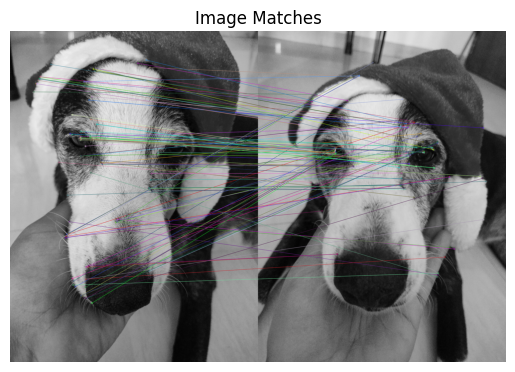

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the images
image1 = cv2.imread('D:/kali.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('D:/kali2.jpg', cv2.IMREAD_GRAYSCALE)

# Choose a common size for resizing
common_size = (1200, 1600)  # Set the desired width and height

# Resize the images to the common size
image1_resized = cv2.resize(image1, common_size)
image2_resized = cv2.resize(image2, common_size)

# Use ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB for the resized images
keypoints1, descriptors1 = orb.detectAndCompute(image1_resized, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2_resized, None)

# Create BFMatcher (Brute Force Matcher)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Draw matches on a new image
img_matches = cv2.drawMatches(image1_resized, keypoints1, image2_resized, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title('Image 2')
plt.axis('off')

plt.show()

# Plot the matches 
plt.imshow(img_matches, cmap='gray')
plt.title("Image Matches")
plt.axis('off')

plt.show()


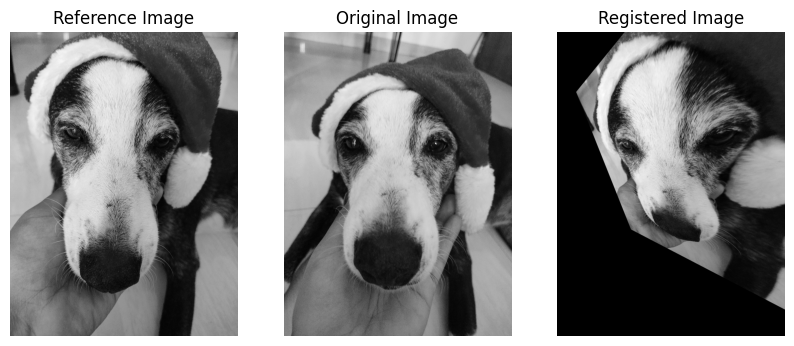

In [43]:
# Extract matched keypoints
points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Find Homography matrix
homography_matrix, _ = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)

# Perform perspective transformation
result_image = cv2.warpPerspective(image1_resized, homography_matrix, common_size)

plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Reference Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_image, cmap='gray')
plt.title('Registered Image')
plt.axis('off')

plt.show()